In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt  
import myLib

In [31]:
# Polynomial Chi Square fitting
def PolynomialChiSqFit(x, y, u, n=2):
    """
    x & y are dataset
    u: Uncertainty
    n: number of parameters. (order+1). 2 for linear
    """
    A = np.zeros((n,n))
    B = np.zeros(n)
    for i in range(n):
        for j in range(n):
            sum = 0 
            for k in range(len(x)):
                sum  += x[k]**(i+j)/u[k]**2
            A[i][j] = sum
    for i in range(n):
        sum = 0
        for j in range(n):
            sum += x[j]**(i)*y[j]/u[j]**2
        B[i] = sum
    C = myLib.GaussSeidel(A,B)
    fit = []
    for i in range(len(x)):
        fit.append(math.exp(C[0]+C[1]*x[i])) # Edit according the order of polynomial needed

    Cov = Inverse(A)
    #print(Cov)

    return fit

# Function to find the inverse of  matrix using solver algos
def Inverse(matrix, function = myLib.JacobiInv):
    I = np.identity(len(matrix))
    Inv = np.zeros((len(matrix),len(matrix)))
    for i in range(len(matrix)):
        Inv[:,i] = function(matrix, I[i])
    return Inv   

In [32]:
data = np.array(myLib.file_opener("bleh.txt"))
x = data[:,0]
y = data[:,1]
u = data[:,2]

fity = PolynomialChiSqFit(x,y,u)
print(fity)

[[1.18732046e-05 0.00000000e+00]
 [0.00000000e+00 6.61911064e-11]]
[0.8834732089806766, 0.8197488407572554, 0.7560244725338342, 0.6923001043104129, 0.6285757360869917, 0.5648513678635705, 0.5011269996401493, 0.4374026314167281, 0.3736782631933069, 0.3099538949698857, 0.24622952674646437, 0.18250515852304316, 0.11878079029962185, 0.05505642207620076, -0.00866794614722044, -0.07239231437064175]


<function matplotlib.pyplot.show(close=None, block=None)>

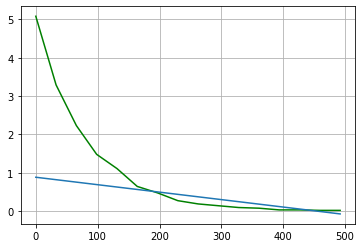

In [33]:
plt.plot(x,y,'green')
plt.plot(x,fity)
plt.grid()
plt.show

In [31]:
m,b = np.polyfit(x,logvt,1)


In [32]:
m

-0.011795023520725109

In [33]:
b

1.549013678417312